In [1]:
import matplotlib.pyplot as plt
import os
os.chdir("E:\\R WorkStation\\Python WorkStation")
os.getcwd()
import pandas as pd
df= pd.read_csv("day.csv", sep = ',')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
df.isnull().any().any()

False

In [3]:
df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [4]:
df.drop(columns=['dteday','atemp', 'casual', 'registered','holiday','workingday'],inplace=True)

In [5]:
df.season=pd.Categorical(df.season)
df.mnth=pd.Categorical(df.mnth)
df.weathersit=pd.Categorical(df.weathersit)
df.temp=pd.to_numeric(df.temp)
df.hum=pd.to_numeric(df.hum)
df.windspeed=pd.to_numeric(df.windspeed)
df.cnt=pd.to_numeric(df.cnt)

In [6]:
weekday_dum = pd.get_dummies(df.weekday)
df = pd.concat([df,weekday_dum],axis=1)
season_dum = pd.get_dummies(df.season)
df = pd.concat([df,season_dum],axis=1)
mnth_dum = pd.get_dummies(df.mnth)
df = pd.concat([df,mnth_dum],axis=1)
weathersit_dum = pd.get_dummies(df.weathersit)
df = pd.concat([df,weathersit_dum],axis=1)
df.drop(columns=['season','mnth','weathersit','weekday'],inplace=True)

In [7]:
X=df.drop(columns=['cnt'])
y = df['cnt']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam,Nadam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import ShuffleSplit

#Neural network
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1],kernel_initializer='normal', activation='relu'))
model.add(Dense(21, activation='relu',kernel_initializer='normal'))
model.add(Dense(15, activation='relu',kernel_initializer='normal'))
model.add(Dense(1,kernel_initializer='normal'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(loss='mean_squared_logarithmic_error', optimizer=Nadam(schedule_decay=0.000001))
    
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,patience=7, verbose=0, mode='auto', restore_best_weights=True)

# Train
epochs_needed=[]
model.fit(X_train.values,y_train.values,validation_data=(X_test.values,y_test.values),callbacks=[monitor],verbose=1,epochs=1000,batch_size=7)
epochs = monitor.stopped_epoch
epochs_needed.append(epochs)

Instructions for updating:
Use tf.cast instead.
Train on 584 samples, validate on 147 samples
Epoch 1/1000
584/584 [==============================] - 1s 1ms/step - loss: 34.2959 - val_loss: 11.9463
Epoch 2/1000
584/584 [==============================] - 0s 212us/step - loss: 6.0729 - val_loss: 2.8676
Epoch 3/1000
584/584 [==============================] - 0s 217us/step - loss: 1.5972 - val_loss: 0.9334
Epoch 4/1000
584/584 [==============================] - 0s 212us/step - loss: 0.6730 - val_loss: 0.6071
Epoch 5/1000
584/584 [==============================] - 0s 206us/step - loss: 0.5199 - val_loss: 0.5444
Epoch 6/1000
584/584 [==============================] - 0s 216us/step - loss: 0.4901 - val_loss: 0.5277
Epoch 7/1000
584/584 [==============================] - 0s 207us/step - loss: 0.4825 - val_loss: 0.5199
Epoch 8/1000
584/584 [==============================] - 0s 219us/step - loss: 0.4776 - val_loss: 0.5129
Epoch 9/1000
584/584 [==============================] - 0s 218us/step - lo

In [11]:
model.save('savedmod\\Bik_rnt.h5')

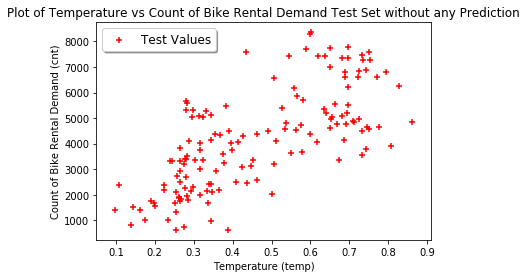

In [12]:
%matplotlib inline
plt.title('Plot of Temperature vs Count of Bike Rental Demand Test Set without any Prediction')
plt.xlabel('Temperature (temp)')
plt.ylabel('Count of Bike Rental Demand (cnt)')
plt.scatter(X_test.temp,y_test,color='red',marker='+',label="Test Values")
plt.legend(loc=2,shadow=True,fontsize='large')

In [13]:
prd=model.predict(X_test.values)

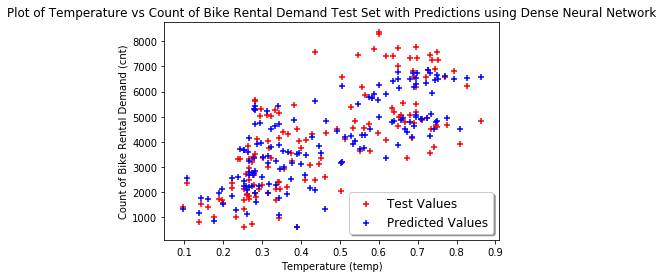

In [14]:
%matplotlib inline
plt.title('Plot of Temperature vs Count of Bike Rental Demand Test Set with Predictions using Dense Neural Network')
plt.xlabel('Temperature (temp)')
plt.ylabel('Count of Bike Rental Demand (cnt)')
plt.scatter(X_test.temp,y_test,color='red',marker='+',label="Test Values")
plt.scatter(X_test.temp,prd,color='blue',marker='+',label="Predicted Values")
plt.legend(loc=2,shadow=True,fontsize='large')

In [15]:
model.evaluate(X_test.values,y_test.values, batch_size=7, verbose=1)

147/147 [==============================] - 0s 78us/step


0.07880046309548475